# WeRateDogs - Data Analysis Report #
-------

## Introduction ##
------

What dog stage was most engaging on twitter and what impression did it create are some of the questions that we are going to find out using the tweets data from WeRateDogs twitter user.

## Data Insights ##
------
To gain insights into our data, we approach the problem using data wrangling staged approach by first gathering the data, assessing,  cleaning, and finally deriving insights for our data.

### Gathering Data ###

The favorite and retweet count on each original tweet will be gathered programmatically from twitter by using twitter api.

Our existing twitter archive data set has the basic tweet information in a csv file.

We also have the Image classification data set that classifies breeds of dogs.


### Data Assessment ###

Visual assessment on twiter data set reviled that our tweet data set did have missing or no values. Programmatic assessment on twiter data set reviled that 59 tweets did not have an image associated with them. 181 tweets were retweets. This indicates that these tweets were not original tweets. Data consistency issues were seen on the status and user id columns. The name column has inaccurate values.

Both visual and programmatic assessment found no data quality issues on our image classification dataset. It was complete, consistent, and valid with no accuracy issues.

The favorite and retweet count on each original tweet was gathered programmatically from twitter by using twitter api.


### Data Cleaning ### 

8 quality issues were cleaned to enable us to tackle the tidiness issues. The first tidiness issues - the retweet and favorite count belong to twitter data set to form an observational unit. 

The second was each variable forms a column, the columns on twitter data set 'doggo', 'floofer', 'pupper', 'puppo' are identifing various stages of dog. We fix this by creating a single column 'growth_stage' that captures the dog stage.

The resulting master data set was saved as csv for the next steps on our journey.

### Data Insights ###

Let's visualize the average impression and engagement metrics first by favorite, retweets, and finally by rating.

In [1]:
# Import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import json as json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
twitter_av_master_df = pd.read_csv('twitter_archive_master.csv')

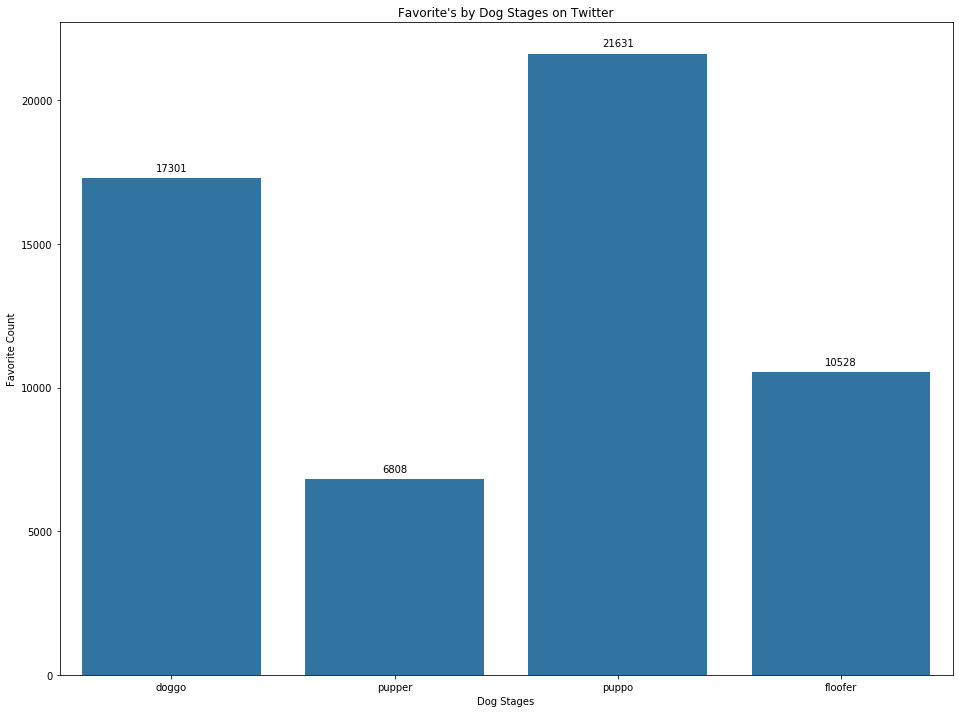

In [3]:
# On twitter which dog stage has more faviourites on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="favorite_count", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Favorite Count")
plt.title("Favorite's by Dog Stages on Twitter")
plt.show()

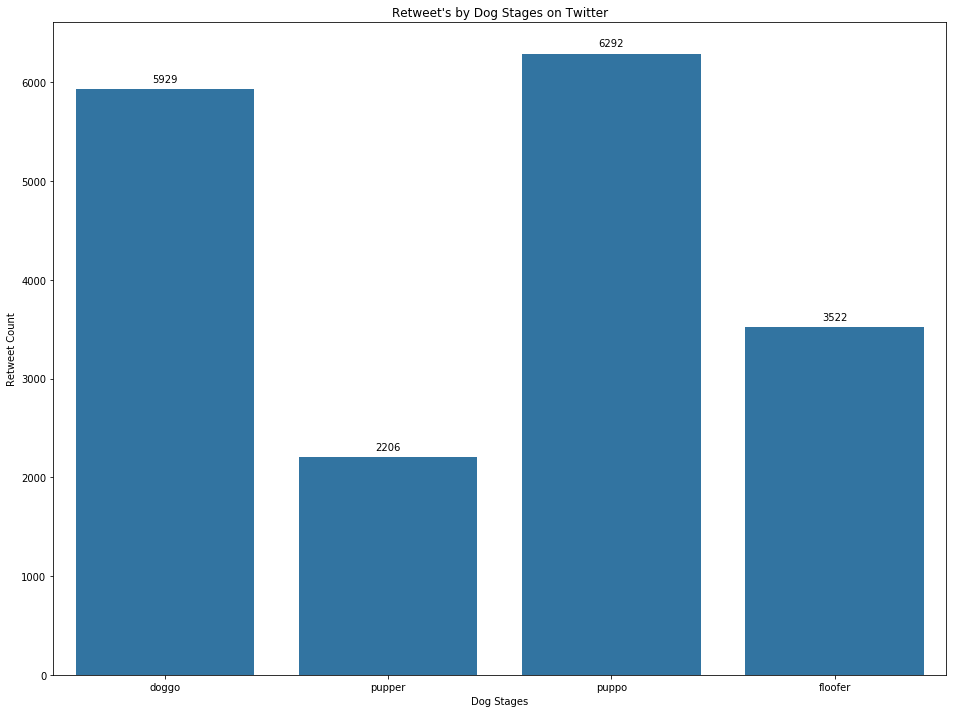

In [4]:
# On twitter which dog stage has high retweets on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="retweet_count", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Count")
plt.title("Retweet's by Dog Stages on Twitter")
plt.show()

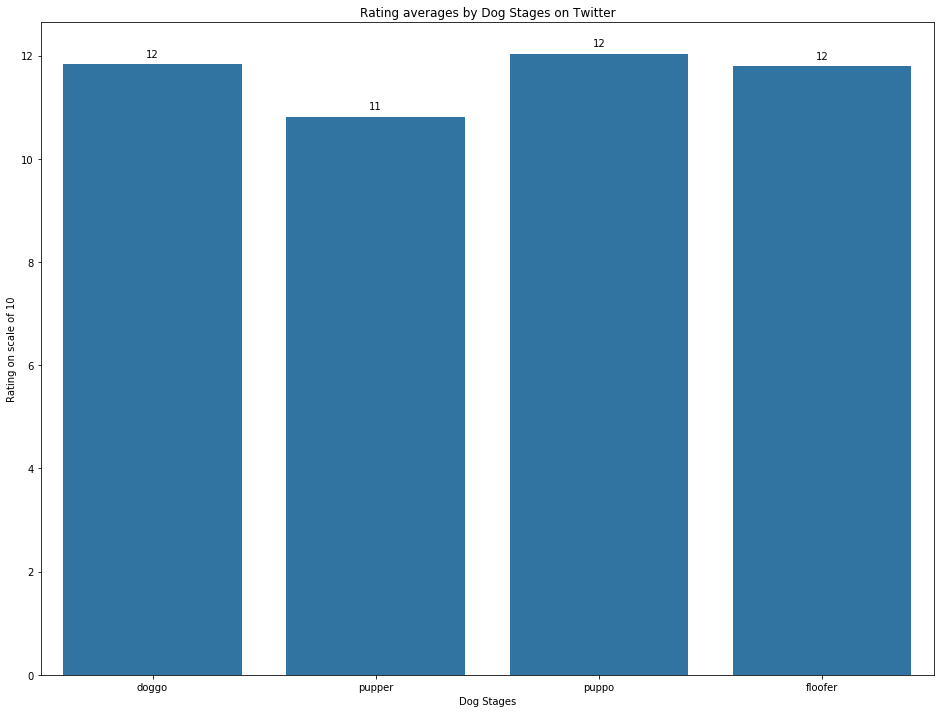

In [5]:
# How are the dogs rated by their stages?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]

splot = sb.barplot(x="growth_stage", y="rating_numerator", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("Dog Stages")
plt.ylabel("Rating on scale of 10")
plt.title("Rating averages by Dog Stages on Twitter")
plt.show()

## Conclusion ##
------

puppo dog stage was highly favorited on average by 21,631.

Again puppo dog stage was highly retweeted on average by 6292.

All three dog stages doggo, puppo, floofer were equally rated on average at 12. While pupper was only off by 1 rating.